In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
df = pd.read_csv("Cleaned and Merged.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19


In [263]:
# cols_to_drop = ['Unnamed: 5', 'Order']
# df.drop(columns=cols_to_drop, inplace=True)

In [264]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   State             185950 non-null  object 
 5   Zip Code          185950 non-null  int64  
 6   Date              185950 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 9.9+ MB


In [266]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Zip Code
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,63877.518935
std,51512.737110,0.442793,332.731330,37776.308300
min,141234.000000,1.000000,2.990000,2215.000000
25%,185831.250000,1.000000,11.950000,10001.000000
50%,230367.500000,1.000000,14.950000,90001.000000
75%,275035.750000,1.000000,150.000000,94016.000000
max,319670.000000,9.000000,1700.000000,98101.000000


In [267]:
from datetime import datetime
import calendar

# Creating a copy of Data-Frame
df2 = df

In [268]:
parts = df["Date"].str.split("/", n = 3, expand = True)
df2["month"]= parts[0].astype('int')
df2["day"]= parts[1].astype('int')
df2["year"]= ("20"+parts[2]).astype('int')

In [269]:
def weekend_or_weekday(year,month,day):
      
    d = datetime(year,month,day)
    if d.weekday()>4:
        return 1
    else:
        return 0
  
df2['weekend'] = df2.apply(lambda x:weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0


In [270]:
# import holidays

# def is_holiday(x):
    
#   india_holidays = holidays.country_holidays('IN')
  
#   if india_holidays.get(x):
#     return 1
#   else:
#     return 0
  
# df2['holidays'] = df2['Date'].apply(is_holiday)
# df2.head()

In [271]:
df2.dropna()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0
...,...,...,...,...,...,...,...,...,...,...,...
185945,305340,Bose SoundSport Headphones,1,99.99,WA,98101,12/31/19,12,31,2019,0
185946,299900,Lightning Charging Cable,1,14.95,CA,94016,12/31/19,12,31,2019,0
185947,298874,34in Ultrawide Monitor,1,379.99,CA,90001,12/31/19,12,31,2019,0
185948,302162,Wired Headphones,1,11.99,NY,10001,12/31/19,12,31,2019,0


In [272]:
sales_by_category = df2.groupby('Product')['Quantity Ordered'].sum()

In [273]:
sorted_sales_by_category = sales_by_category.sort_values(ascending=False)
print(sorted_sales_by_category)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


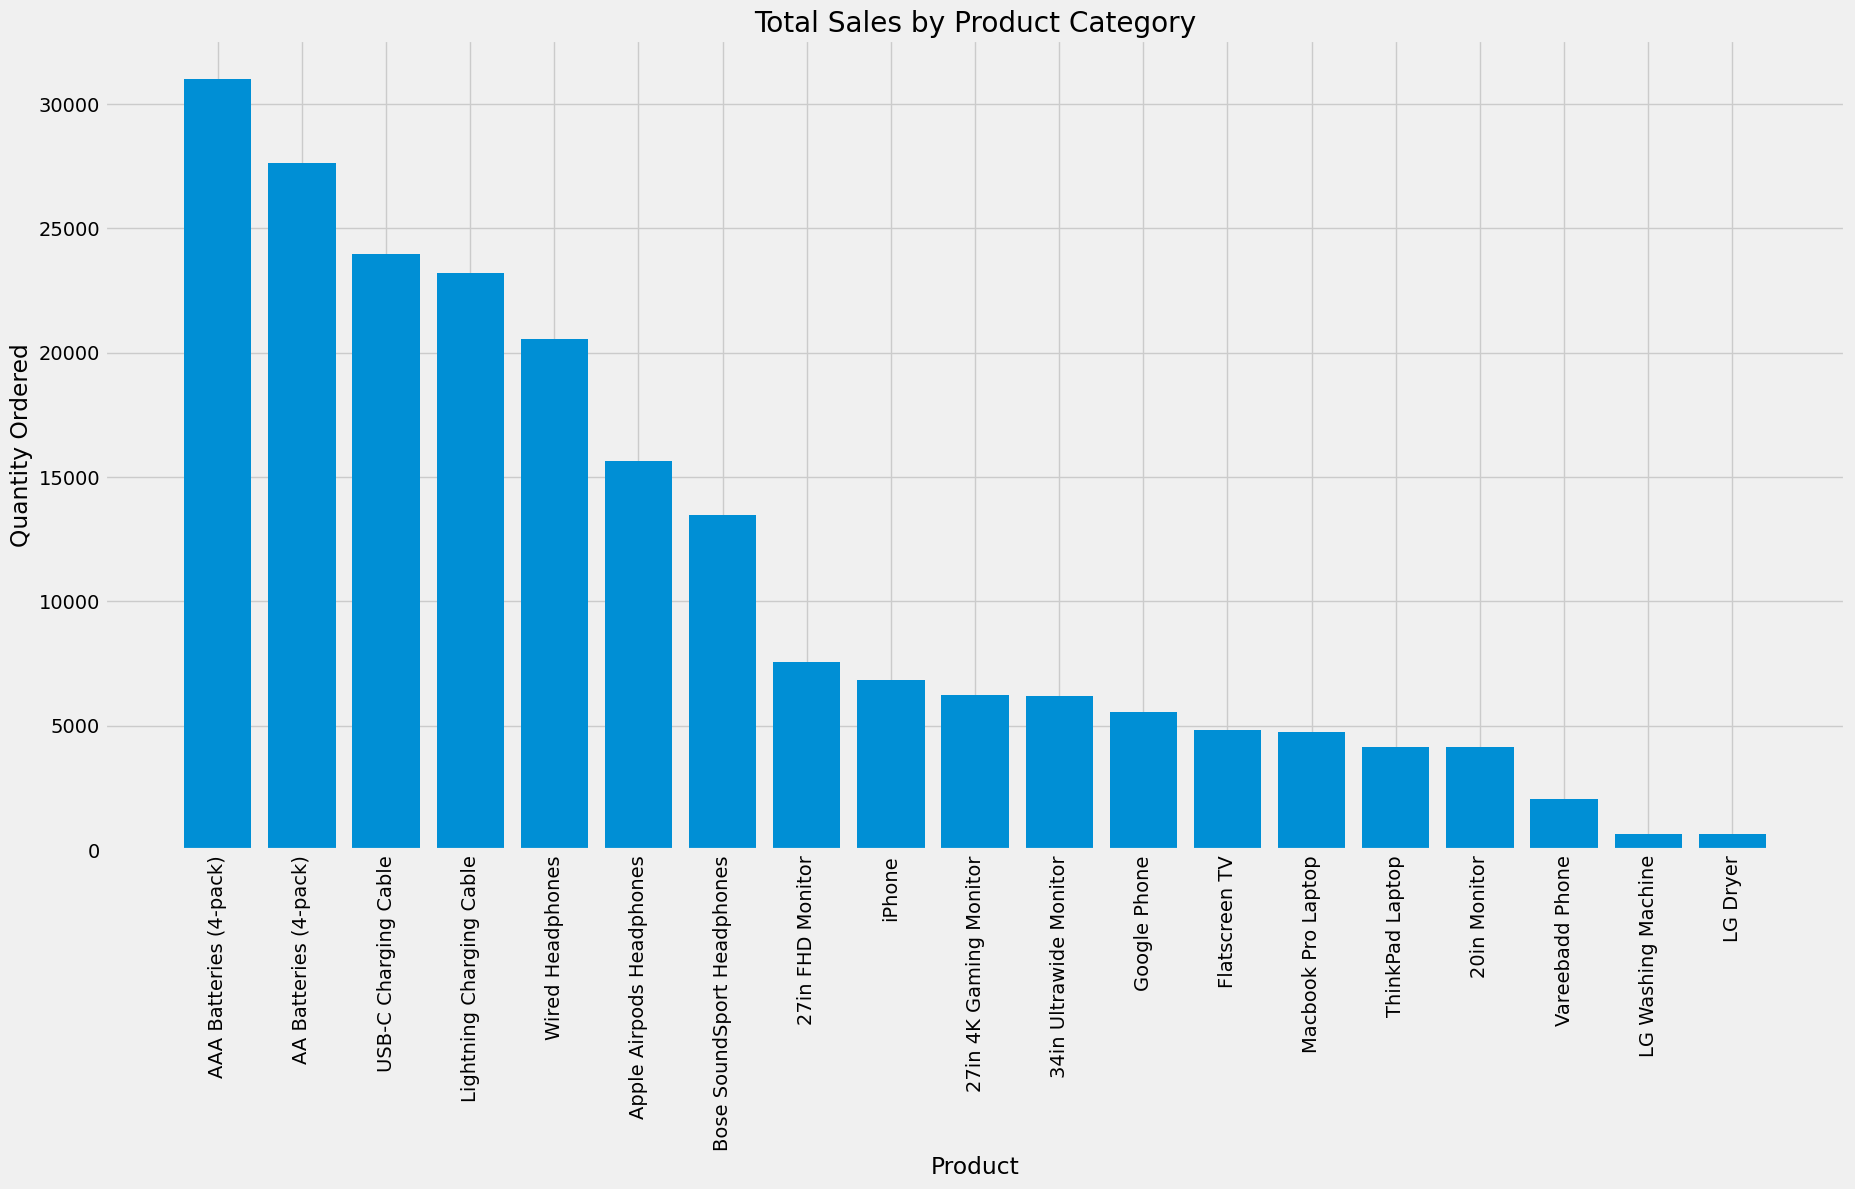

In [274]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(sorted_sales_by_category.index, sorted_sales_by_category)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Total Sales by Product Category')
plt.xticks(rotation='vertical')
plt.show()

In [275]:
df2['m1'] = np.sin(df2['month'] * (2 * np.pi / 12))
df2['m2'] = np.cos(df2['month'] * (2 * np.pi / 12))
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0,0.5,0.866025
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0,0.5,0.866025
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0,0.5,0.866025


In [276]:
def which_day(year, month, day):
      
    d = datetime(year,month,day)
    return d.weekday()
  
df2['weekday'] = df2.apply(lambda x: which_day(x['year'], x['month'], x['day']), axis=1)
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2,weekday
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0,0.5,0.866025,1
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0,0.5,0.866025,1
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0,0.5,0.866025,1


In [278]:
df2['Product'].nunique()

19

In [279]:
df2['State'].nunique()

8

In [280]:
df2.shape

(185950, 14)

In [281]:
df2.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
State                object
Zip Code              int64
Date                 object
month                 int32
day                   int32
year                  int32
weekend               int64
m1                  float64
m2                  float64
weekday               int64
dtype: object

In [282]:
f'Total dates: {df2[["Date"]].nunique()[0]}'

'Total dates: 366'

In [287]:
df3 = df2
df3 = df3.groupby('Date').sum('Quantity Ordered')
df3.index = pd.to_datetime(df3.index)
df3 = df3.drop(['Order ID','month', 'Price Each', 'day', 'year', 'weekend', 'm1', 'm2', 'weekday', 'Zip Code'], axis=1)
df3.head()

,Quantity Ordered
Date,
2019-01-01,343
2020-01-01,41
2019-01-02,368
2019-01-03,330
2019-01-04,330


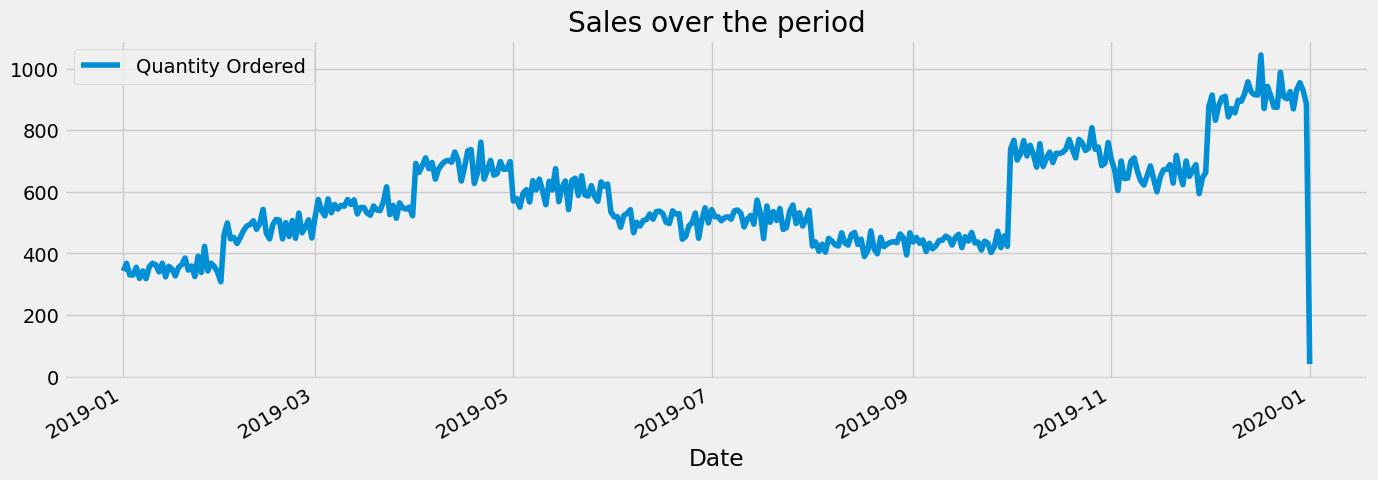

In [288]:
import seaborn as sns

color_pallet = sns.color_palette()
plt.style.use('fivethirtyeight')

df3.plot(
        # style='.',
        figsize=(15, 5),
        title='Sales over the period')
plt.show()

In [289]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2,weekday
0,141604,27in FHD Monitor,1,149.99,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
1,146912,AA Batteries (4-pack),1,3.84,CA,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
2,147474,Wired Headphones,1,11.99,WA,98101,01/01/19,1,1,2019,0,0.5,0.866025,1
3,146833,Apple Airpods Headphones,1,150.00,MA,2215,01/01/19,1,1,2019,0,0.5,0.866025,1
4,149368,AAA Batteries (4-pack),1,2.99,TX,75001,01/01/19,1,1,2019,0,0.5,0.866025,1


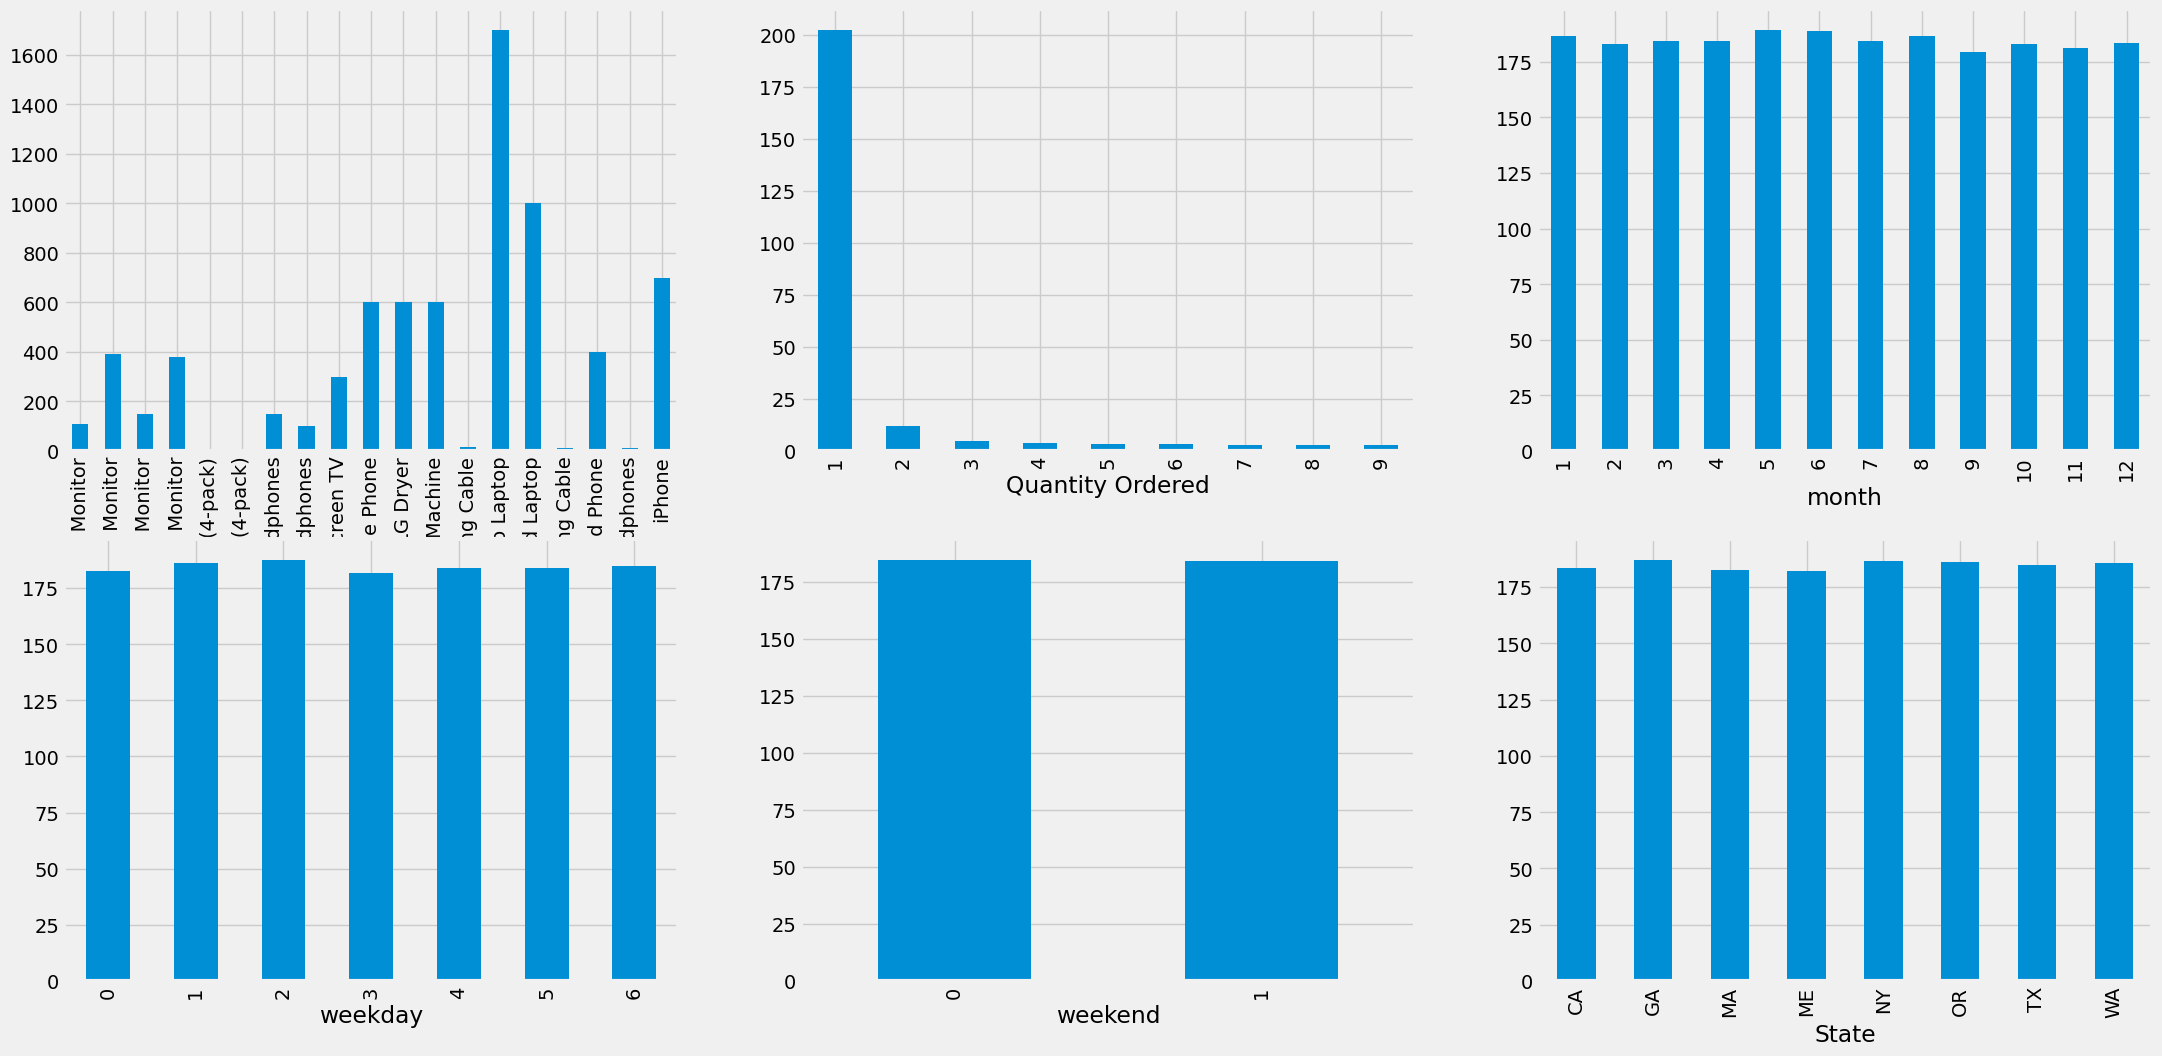

In [290]:
features = ['Product', 'Quantity Ordered', 'month',\
            'weekday', 'weekend', 'State']
  
plt.subplots(figsize=(24, 12))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df2.groupby(col).mean()['Price Each'].plot.bar()
plt.show()

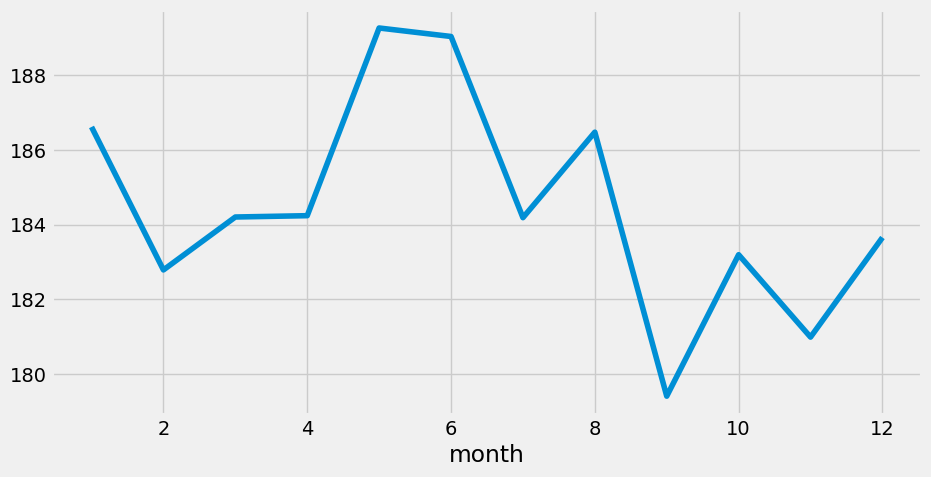

In [292]:
plt.figure(figsize=(10,5))
df2.groupby('month').mean()['Price Each'].plot()
plt.show()

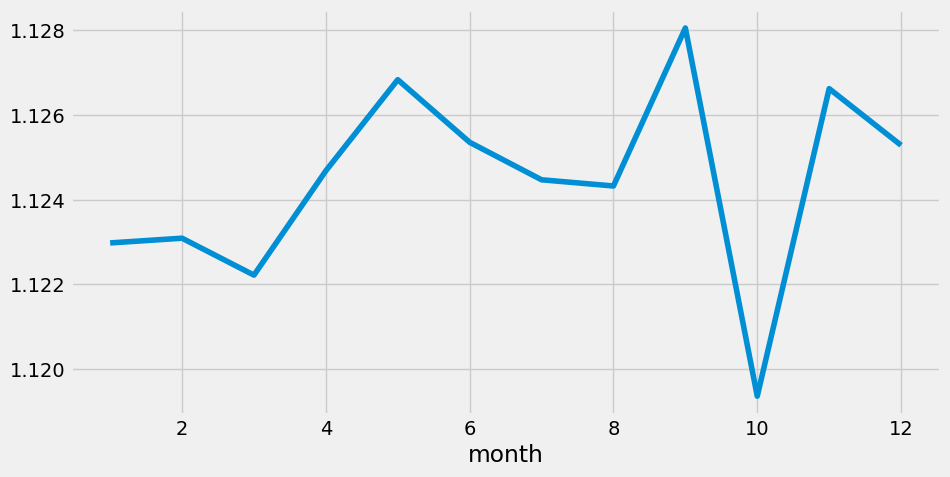

In [293]:
plt.figure(figsize=(10,5))
df2.groupby('month').mean()['Quantity Ordered'].plot()
plt.show()

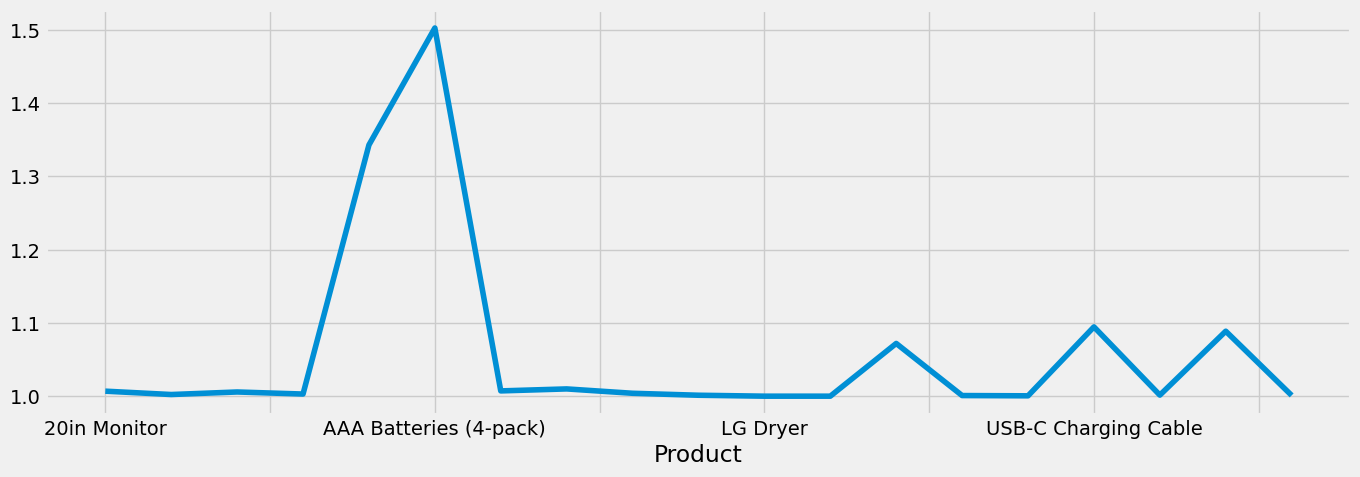

In [294]:
plt.figure(figsize=(15,5))
df2.groupby('Product').mean()['Quantity Ordered'].plot()
plt.show()

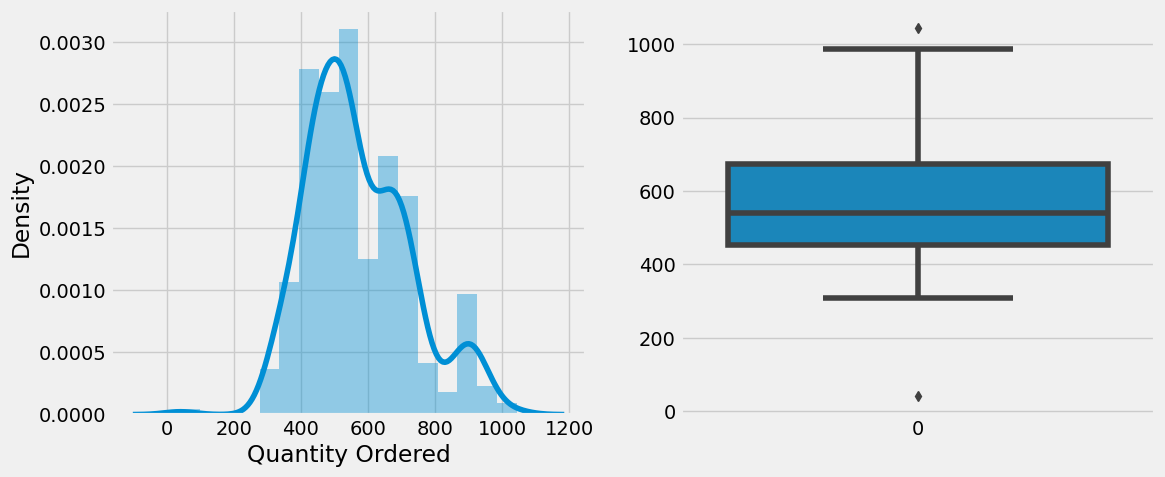

In [295]:
import seaborn as sb

plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sb.distplot(df3['Quantity Ordered'])
  
plt.subplot(1, 2, 2)
sb.boxplot(df3['Quantity Ordered'])
plt.show()

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
  
import warnings
warnings.filterwarnings('ignore')

In [331]:
le = LabelEncoder()
df4 = df2
df4['Product'] = le.fit_transform(df4['Product'])
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2,weekday
0,141604,2,1,149.99,0,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
1,146912,4,1,3.84,0,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
2,147474,17,1,11.99,7,98101,01/01/19,1,1,2019,0,0.5,0.866025,1
3,146833,6,1,150.00,2,2215,01/01/19,1,1,2019,0,0.5,0.866025,1
4,149368,5,1,2.99,6,75001,01/01/19,1,1,2019,0,0.5,0.866025,1


In [332]:
df4['State'] = le.fit_transform(df4['State'])
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,State,Zip Code,Date,month,day,year,weekend,m1,m2,weekday
0,141604,2,1,149.99,0,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
1,146912,4,1,3.84,0,94016,01/01/19,1,1,2019,0,0.5,0.866025,1
2,147474,17,1,11.99,7,98101,01/01/19,1,1,2019,0,0.5,0.866025,1
3,146833,6,1,150.00,2,2215,01/01/19,1,1,2019,0,0.5,0.866025,1
4,149368,5,1,2.99,6,75001,01/01/19,1,1,2019,0,0.5,0.866025,1


In [333]:
# df4 = df4.groupby(['month', 'Product', 'State']).sum('Quantity Ordered')
# df4.index = pd.to_datetime(df4.index)
df4 = df4.drop(['Order ID', 'Price Each', 'day', 'year', 'weekend', 'm1', 'm2', 'weekday', 'Zip Code'], axis=1)
df4.head()

,Product,Quantity Ordered,State,Date,month
0,2,1,0,01/01/19,1
1,4,1,0,01/01/19,1
2,17,1,7,01/01/19,1
3,6,1,2,01/01/19,1
4,5,1,6,01/01/19,1


In [334]:
df4

,Product,Quantity Ordered,State,Date,month
0,2,1,0,01/01/19,1
1,4,1,0,01/01/19,1
2,17,1,7,01/01/19,1
3,6,1,2,01/01/19,1
4,5,1,6,01/01/19,1
...,...,...,...,...,...
185945,7,1,7,12/31/19,12
185946,12,1,0,12/31/19,12
185947,3,1,0,12/31/19,12
185948,17,1,4,12/31/19,12


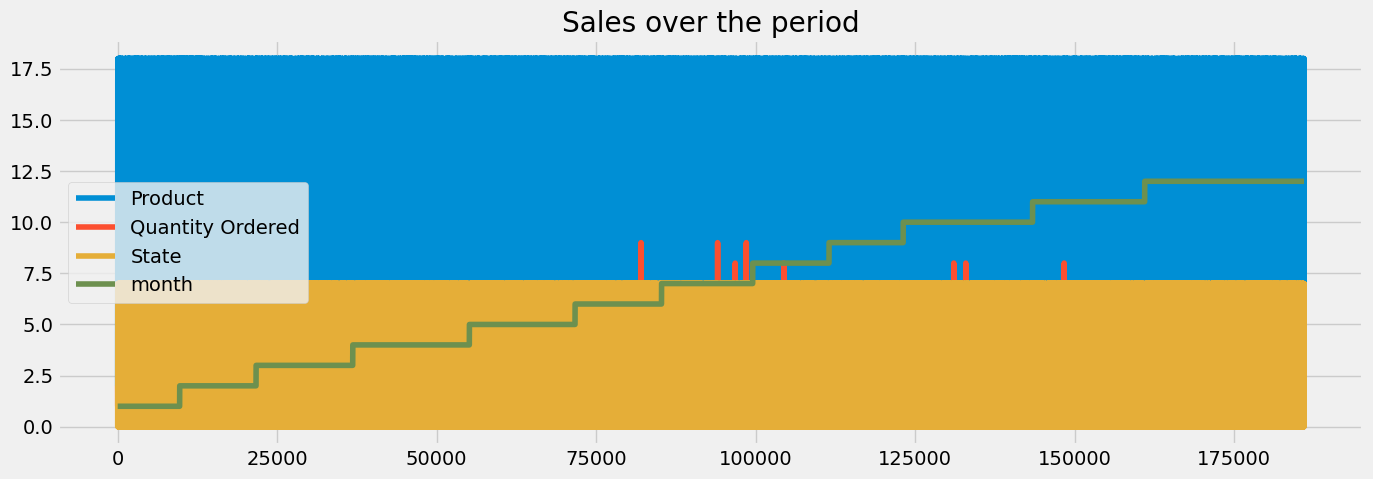

In [335]:
import seaborn as sns

color_pallet = sns.color_palette()
plt.style.use('fivethirtyeight')

df4.plot(
        # style='.',
        figsize=(15, 5),
        title='Sales over the period')
plt.show()

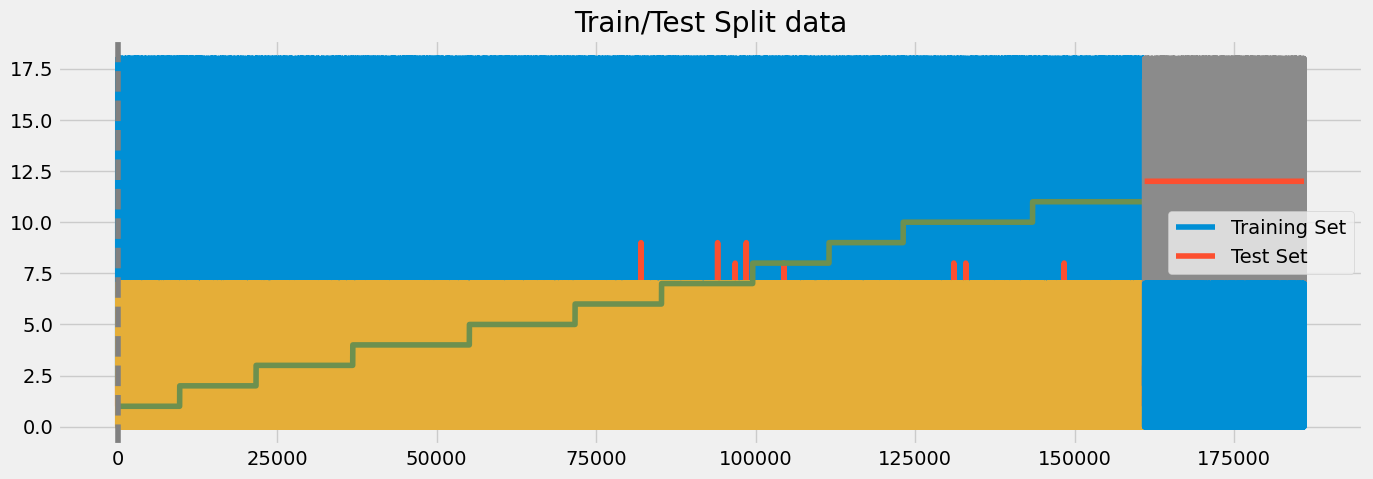

In [336]:
train = df4.loc[df4['month'] < 12]
test = df4.loc[df4['month'] >= 12]

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Train/Test Split data')
test.plot(ax=ax, label='Test Set')
ax.axvline(1, color='Gray', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

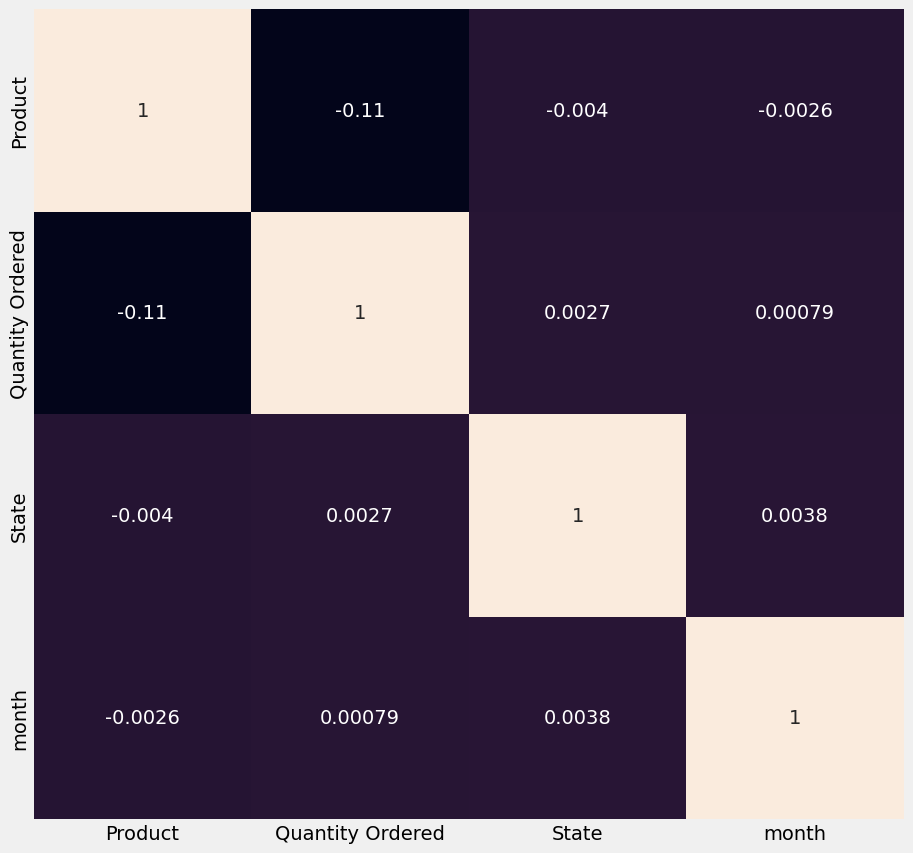

In [337]:
plt.figure(figsize=(10, 10))
sb.heatmap(df4.corr(),
           annot=True,
           cbar=False)
plt.show()